In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
df = pd.read_csv('Admission_Prediction.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [6]:
 df.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [7]:
df['GRE Score'].mode()[0]

312.0

In [8]:
df['GRE Score'].fillna(df['GRE Score'].mode()[0],inplace=True)

In [9]:
df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0],inplace=True)

In [10]:
df['University Rating'].fillna(df['University Rating'].mode()[0],inplace=True)

In [11]:
x = df.drop(['Serial No.','Chance of Admit'],axis=1)
y = df['Chance of Admit']

In [12]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


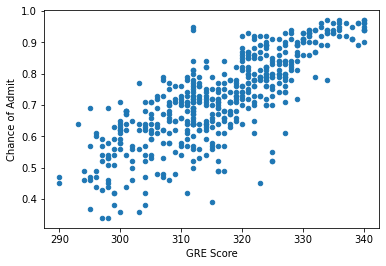

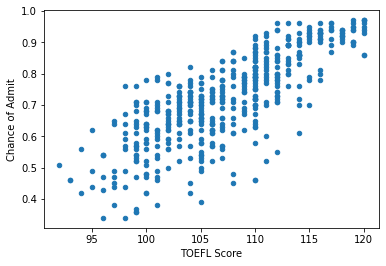

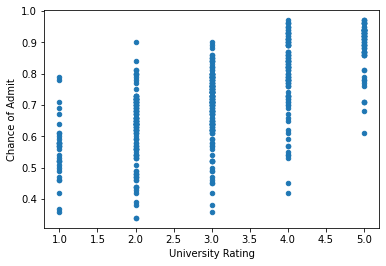

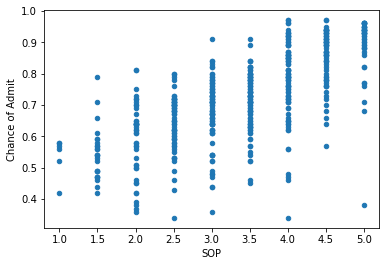

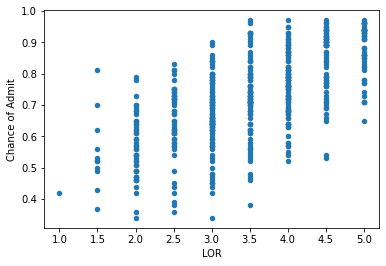

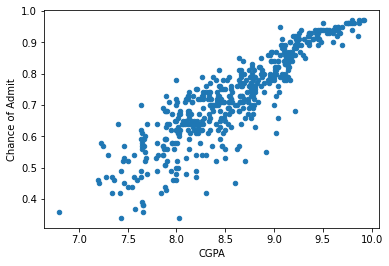

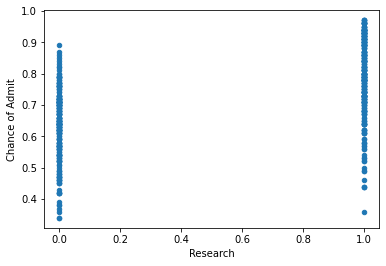

In [13]:
for i in x.columns:
    df.plot.scatter(x=i,y='Chance of Admit')

In [14]:
from sklearn.preprocessing import StandardScaler
scaler_feature = StandardScaler()
scaler_label = StandardScaler()
scaled_data = scaler_feature.fit_transform(x)
scaled_data

array([[ 1.85052822,  1.77547686,  0.78200955, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.68147064, -0.04027672,  0.78200955, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.39765943, -0.53548224, -0.10462259, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.22103568,  2.10561387,  1.66864169, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39765943, -0.70055074,  0.78200955, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.95125316,  0.95013432,  0.78200955, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [15]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.33,random_state=100)

In [16]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_x,train_y)

LinearRegression()

In [17]:
from sklearn.metrics import r2_score
score = r2_score(reg.predict(test_x),test_y)
score

0.8076681567897024

In [18]:
filename = 'finalized_model.pickle'
pickle.dump(reg,open(filename,'wb'))

In [19]:
loaded_model = pickle.load(open(filename,'rb'))
a = loaded_model.predict(scaler_feature.transform([[300,110,5,5,5,10,1]]))
a

array([-0.91215635])

In [20]:
scaler_test = StandardScaler()

In [21]:
loaded_model = pickle.load(open(filename,'rb'))
prediction = loaded_model.predict(scaler_feature.transform([[300,110,5,5,5,10,1]]))
print(prediction[0])

-0.9121563462907019
